In [1]:
import numpy as np
import matplotlib.pyplot as pt
import pandas as pd
import statsmodels.stats.outliers_influence as oi
import os
import matplotlib.pyplot as plt#visualization
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")
df=pd.read_csv('Churn.csv')

"""----------------------------DATA PREPARATION--------------------------"""

for i in df.columns:
    df[i]=df[i].replace(" ",np.NaN)
    
#print (df.isnull().sum())

df.dropna(inplace=True)
df = df.reset_index()[df.columns]
for c_n in df.columns:
    #print c_n
   # if X[c_n]=='object' :
    unique_cat=df[c_n].nunique()

    X=df.copy()

#Tenure to categorical column
'''def tenure_lab(t) :
    
    if t <= 12 :
        return 1
    elif (t > 12) & (t <= 24 ):
        return 2
    elif (t > 24) & (t <= 48) :
        return 3
    elif (t > 48) & (t <= 60) :
        return 4
    elif t > 60 :
        return 5

X["tenure"]=X["tenure"].map(tenure_lab)'''

X=X.drop('Churn',1)
Y=df.Churn
X=X.drop('customerID',1)

todummy_list  =X.nunique()[X.nunique() < 6].keys().tolist()
num_cols   = [x for x in X.columns if x not in todummy_list]


for i in todummy_list:
    dummies= pd.get_dummies(X[i],prefix=i)
    #print dummies
    #dummies=dummies.iloc[:,1:]
    X=X.drop(i,1)
    X=pd.concat([dummies,X],axis=1)
    
X=X.drop(['StreamingTV_No internet service','StreamingMovies_No internet service','TechSupport_No internet service','DeviceProtection_No internet service','OnlineBackup_No internet service'],axis=1)    
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn import preprocessing

normalized_X = preprocessing.normalize(X[num_cols])
normalized_X = pd.DataFrame(normalized_X,columns=num_cols)
X=X.drop(num_cols,1)
X=pd.concat([X,normalized_X ],axis=1)
#X = X.merge(normalized_X,left_index=True,right_index=True,how = "left")



'''std = StandardScaler().fit(X[num_cols])
x_transformed=std.transform(X[num_cols])
x_transformed_df=pd.DataFrame(x_transformed,columns=num_cols)
x_kf=X.drop(num_cols,1)
x_kf=pd.concat([x_kf.reset_index(drop=True),x_transformed_df.reset_index(drop=True) ],axis=1)'''

#print (X.isnull().sum())

#Converting strings Yes?No as 0's and 1's
le = LabelEncoder()
Y= le.fit_transform(Y)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=0)





In [2]:
def roc_plot(clf_obj,x_test,y_test,predictions):
    
    # all parameters not specified are set to their defaults

    fpr, tpr, thresholds = roc_curve(y_test, predictions)

    
    #plot no skill
    from matplotlib import pyplot
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr, tpr, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, predictions)
    print('AUC: %.3f' % auc)
    '''probs = m.predict_proba(x_test)
    probs = probs[:, 1]


    fpr1, tpr1, thresholds1 = roc_curve(y_test, probs)

    #plot no skill
    pyplot.plot([0, 1], [0, 1], linestyle='--')
    # plot the roc curve for the model
    pyplot.plot(fpr1, tpr1, marker='.')
    # show the plot
    pyplot.show()

    auc = roc_auc_score(y_test, probs)
    print('AUC: %.3f' % auc)'''


    import matplotlib.pyplot as plt
    import seaborn as sns
    cm = metrics.confusion_matrix(y_test, predictions)
    score = clf_obj.score(x_test, y_test)
    plt.figure(figsize=(9,9))
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
    plt.ylabel('Actual label');
    plt.xlabel('Predicted label');
    all_sample_title =' Accuracy Score: {0}'.format(score)
    plt.title(all_sample_title, size = 15);

print(x_train.shape)

(5625, 41)


In [3]:
'''-------------------------FEATURE SELECTION(mutual_info_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif

test = SelectKBest(mutual_info_classif, k=13)
fit=test.fit(x_train,y_train)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_train_selected=x_train[columns_selected]
x_test_selected=x_test[columns_selected]

print(x_train_selected.shape)
print(x_test_selected.shape)

(5625, 13)
(1407, 13)


In [4]:
len(y_train)

5625

		--------------MLP_mutual_info_classif----------------



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.62      0.47      0.53       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.72      0.68      0.70      1407
weighted avg       0.77      0.79      0.77      1407



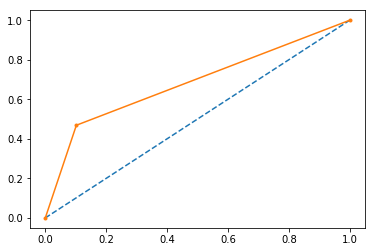

AUC: 0.683


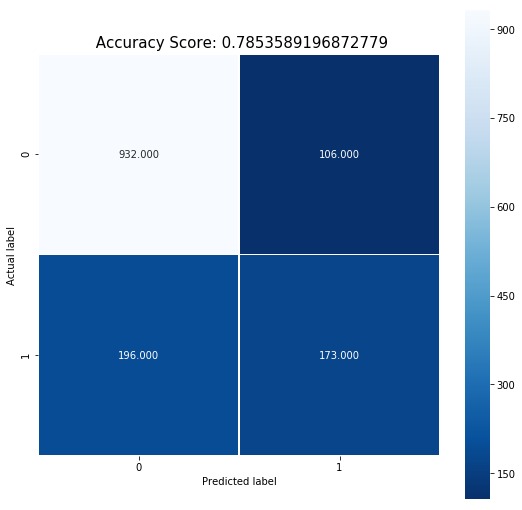

In [5]:
print ('\t\t--------------MLP_mutual_info_classif----------------\n\n\n')

from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
m= mlp.fit(x_train_selected,y_train)
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)

roc_plot(m,x_test_selected,y_test,predictions)


		--------------RANDOM_FOREST_mutual_info_classif----------------



              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1038
           1       0.60      0.51      0.55       369

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



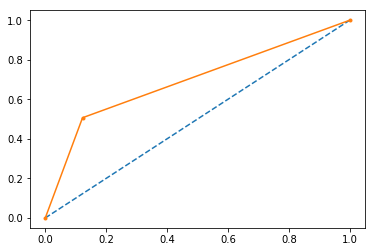

AUC: 0.692


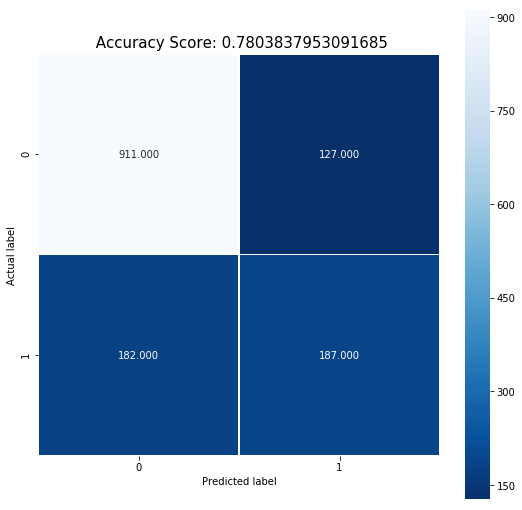

In [6]:
print ('\t\t--------------RANDOM_FOREST_mutual_info_classif----------------\n\n\n')

from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=75)
m=Rf.fit(x_train_selected,y_train)
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

roc_plot(m,x_test_selected,y_test,predictions)

		--------------XG-BOOST_mutual_info_classif----------------



              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.50      0.56       369

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



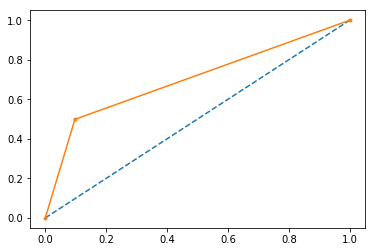

AUC: 0.701


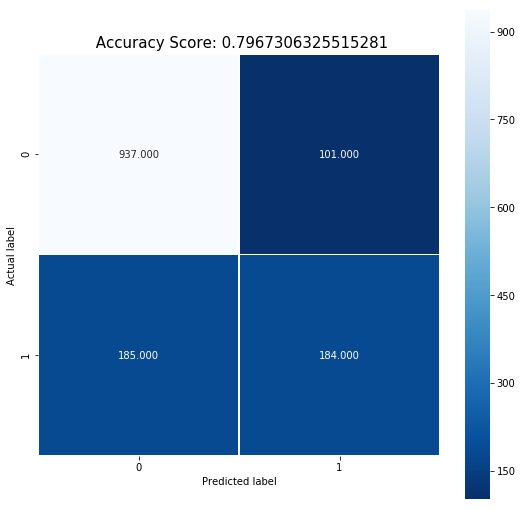

In [7]:
print ('\t\t--------------XG-BOOST_mutual_info_classif----------------\n\n\n')

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(x_train_selected,y_train) 
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test_selected,y_test,predictions)

		--------------LOGISTIC REGRESSION_Processed_mutual_info_classif----------------



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.49      0.55       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



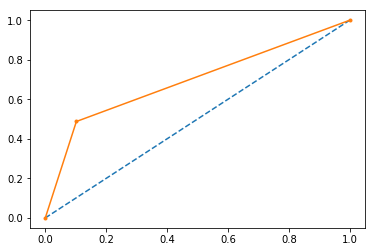

AUC: 0.693


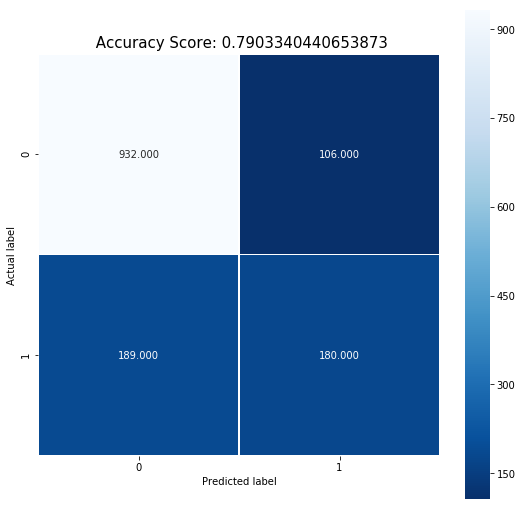

In [8]:
"""--------------------------(MODELING PHASE)--{LOGISTIC REGRESSION_Processed_mutual_info_classif}---------------------------------"""

print ('\t\t--------------LOGISTIC REGRESSION_Processed_mutual_info_classif----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train_selected, y_train)

predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)



roc_plot(m,x_test_selected,y_test,predictions)

		--------------S.V.M_processed_mutual_info_classif----------------



              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1038
           1       0.68      0.36      0.47       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.77      0.79      0.76      1407



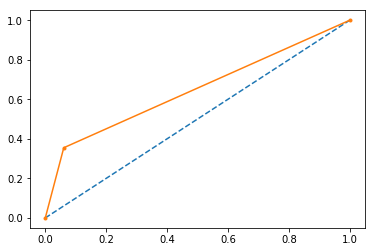

AUC: 0.647


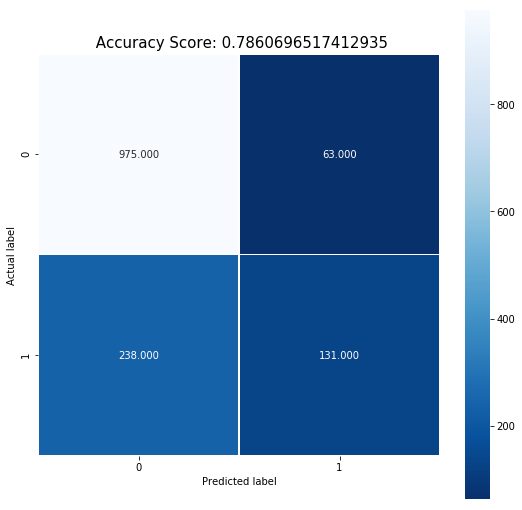

In [9]:
print ('\t\t--------------S.V.M_processed_mutual_info_classif----------------\n\n\n')

from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
m=SVM.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)



roc_plot(m,x_test_selected,y_test,predictions)

		--------------Naive Bayes_Processed_mutual_info_classif----------------



              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1038
           1       0.48      0.82      0.61       369

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407



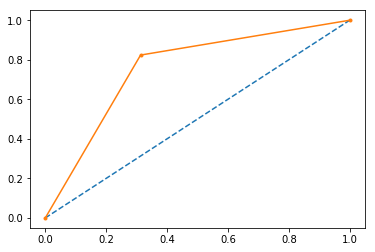

AUC: 0.755


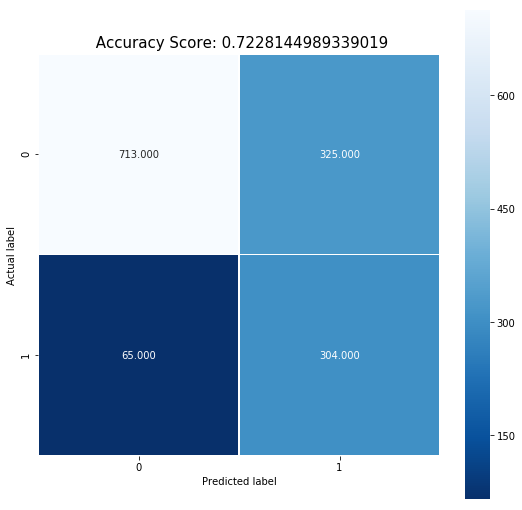

In [10]:
from sklearn.naive_bayes import GaussianNB

print ('\t\t--------------Naive Bayes_Processed_mutual_info_classif----------------\n\n\n')
gnb=GaussianNB()
m= gnb.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]



roc_plot(m,x_test_selected,y_test,predictions)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1038
           1       0.69      0.38      0.49       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



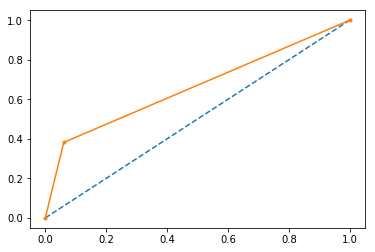

AUC: 0.661


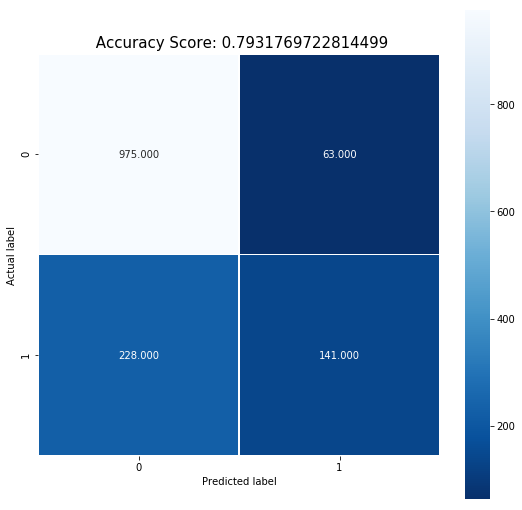

In [11]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_processed_mutual_info_classif}--------------------"""

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

m=clf_gini.fit(x_train_selected, y_train) 
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]



roc_plot(m,x_test_selected,y_test,predictions)

In [1]:
'''-------------------------FEATURE SELECTION(chi2)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(chi2, k=13)
fit=test.fit(x_train,y_train)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_train_selected=x_train[columns_selected]
x_test_selected=x_test[columns_selected]

print(x_train_selected.shape)
print(x_test_selected.shape)


NameError: name 'x_train' is not defined

		--------------MLP_(CHI2)----------------



              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1038
           1       0.69      0.38      0.49       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



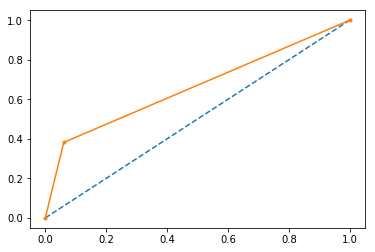

AUC: 0.661


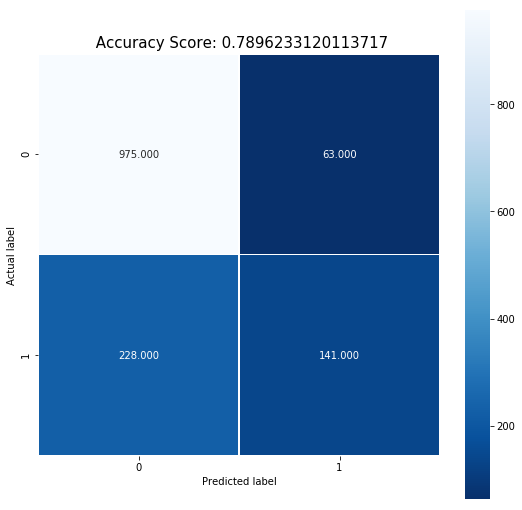

In [13]:
print ('\t\t--------------MLP_(CHI2)----------------\n\n\n')



from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
m= mlp.fit(x_train_selected,y_train)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
roc_plot(m,x_test_selected,y_test,predictions)

		--------------RANDOM_FOREST_(CHI2)----------------



              precision    recall  f1-score   support

           0       0.82      0.85      0.84      1038
           1       0.54      0.49      0.51       369

   micro avg       0.76      0.76      0.76      1407
   macro avg       0.68      0.67      0.67      1407
weighted avg       0.75      0.76      0.75      1407



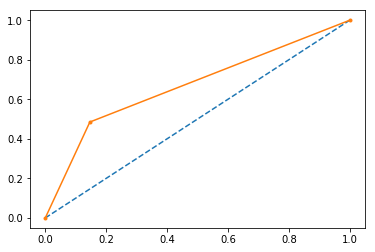

AUC: 0.669


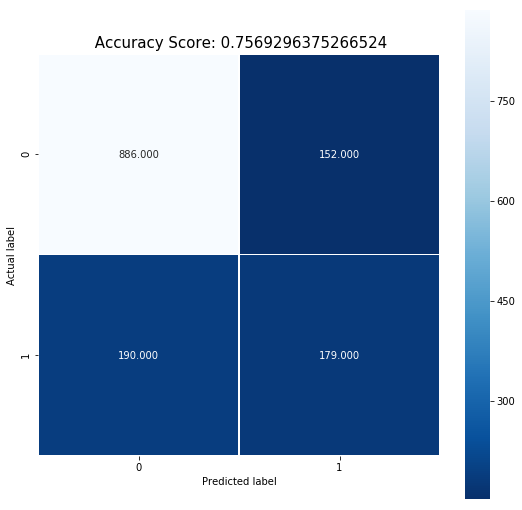

In [14]:
print ('\t\t--------------RANDOM_FOREST_(CHI2)----------------\n\n\n')

from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=75)
m=Rf.fit(x_train_selected,y_train)
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

roc_plot(m,x_test_selected,y_test,predictions)

		--------------XG-BOOST_(CHI2)----------------



              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.64      0.49      0.55       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



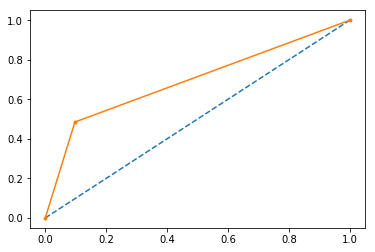

AUC: 0.694


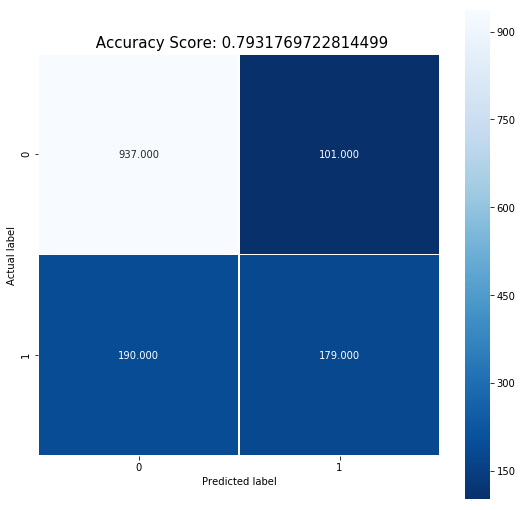

In [15]:
print ('\t\t--------------XG-BOOST_(CHI2)----------------\n\n\n')

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(x_train_selected,y_train) 
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test_selected,y_test,predictions)

		--------------LOGISTIC REGRESSION_Processed_(Chi2)----------------



              precision    recall  f1-score   support

           0       0.83      0.90      0.87      1038
           1       0.64      0.50      0.56       369

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.70      0.71      1407
weighted avg       0.78      0.80      0.79      1407



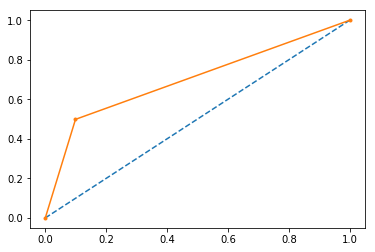

AUC: 0.700


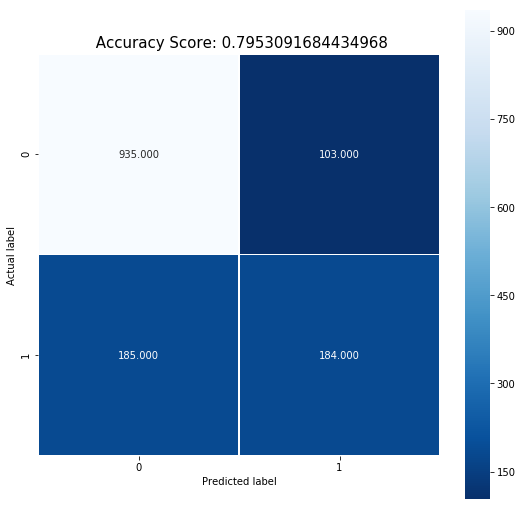

In [16]:

print ('\t\t--------------LOGISTIC REGRESSION_Processed_(Chi2)----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train_selected, y_train)

predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)



roc_plot(m,x_test_selected,y_test,predictions)


		--------------S.V.M_Processed(chi2)----------------



              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1038
           1       0.70      0.36      0.47       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



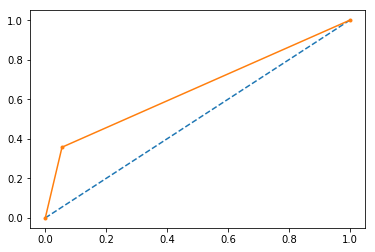

AUC: 0.651


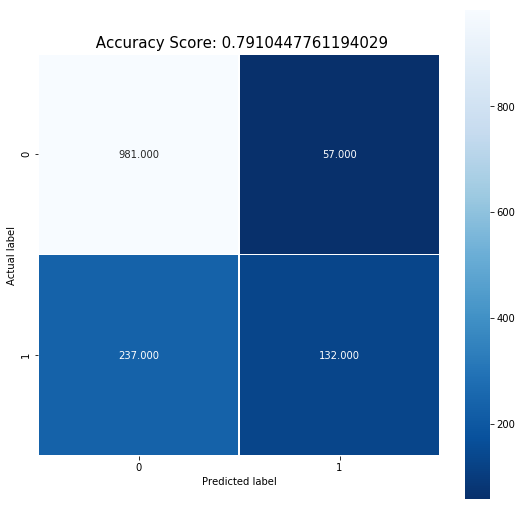

In [17]:
"""--------------------------(MODELING PHASE)--{S.V.M_processed(chi2)}---------------------------------"""

print ('\t\t--------------S.V.M_Processed(chi2)----------------\n\n\n')


from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
m=SVM.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)



roc_plot(m,x_test_selected,y_test,predictions)

		--------------S.V.M_Processed(chi2)----------------



              precision    recall  f1-score   support

           0       0.81      0.95      0.87      1038
           1       0.70      0.36      0.47       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.65      0.67      1407
weighted avg       0.78      0.79      0.77      1407



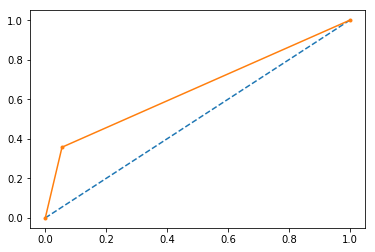

AUC: 0.651


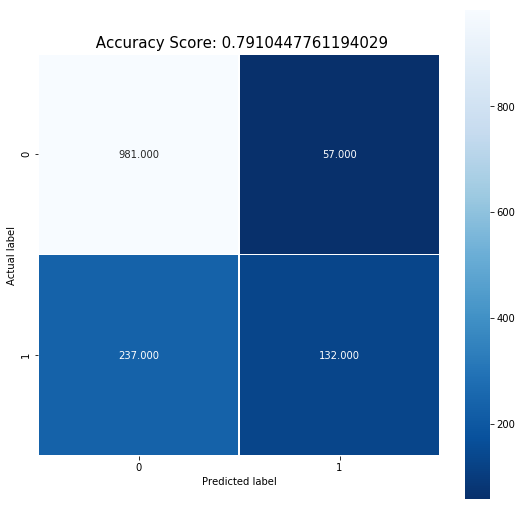

In [29]:
"""--------------------------(MODELING PHASE)--{S.V.M_processed(chi2)}---------------------------------"""

print ('\t\t--------------S.V.M_Processed(chi2)----------------\n\n\n')


from sklearn.svm import SVC
SVM=SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=True, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
m=SVM.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)



roc_plot(m,x_test_selected,y_test,predictions)

		--------------Naive Bayes_Processed(chi2)----------------



              precision    recall  f1-score   support

           0       0.92      0.68      0.78      1038
           1       0.48      0.83      0.61       369

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.70      0.76      0.69      1407
weighted avg       0.80      0.72      0.74      1407



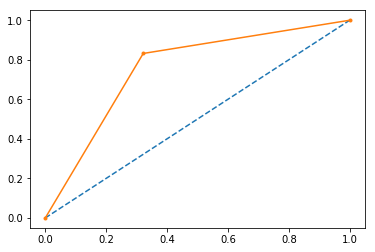

AUC: 0.755


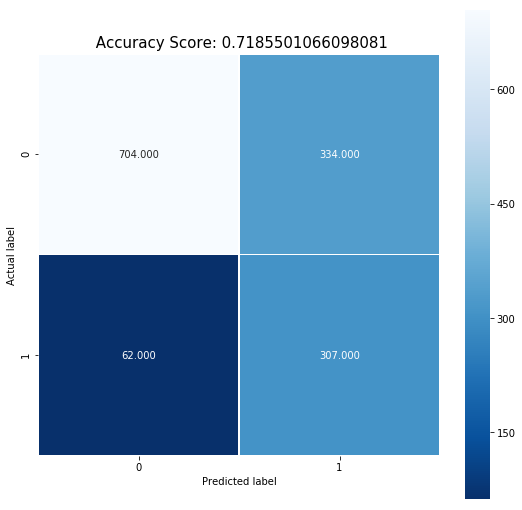

In [18]:

"""--------------------------(MODELING PHASE)--{Naive Bayes_processed(chi2)}---------------------------------"""

from sklearn.naive_bayes import GaussianNB

print ('\t\t--------------Naive Bayes_Processed(chi2)----------------\n\n\n')

gnb=GaussianNB()
m= gnb.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]




roc_plot(m,x_test_selected,y_test,predictions)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1038
           1       0.69      0.38      0.49       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



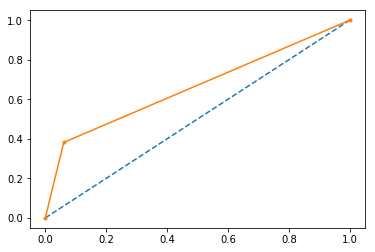

AUC: 0.661


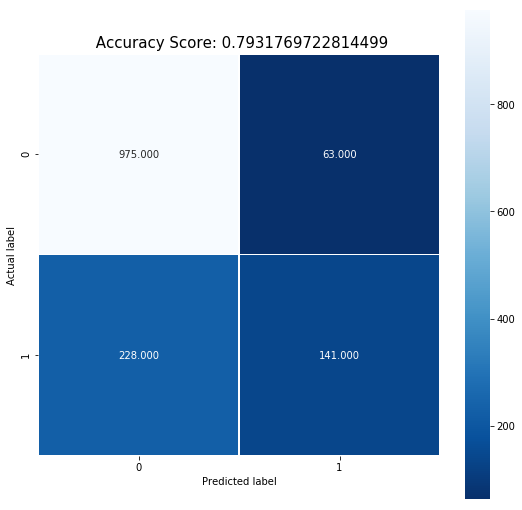

In [19]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_processed_(chi2)}--------------------"""

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

m=clf_gini.fit(x_train_selected, y_train) 
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]



roc_plot(m,x_test_selected,y_test,predictions)

In [20]:
'''-------------------------FEATURE SELECTION(f_classif)-------------------------------'''
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import mutual_info_classif
test = SelectKBest(f_classif, k=13)
fit=test.fit(x_train,y_train)
indices_selected= fit.get_support(indices=True)
columns_selected= [X.columns[i] for i in indices_selected]
x_train_selected=x_train[columns_selected]
x_test_selected=x_test[columns_selected]

print(x_train_selected.shape)
print(x_test_selected.shape)

(5625, 13)
(1407, 13)


		--------------RANDOM_FOREST_(f_classif)----------------



              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1038
           1       0.59      0.50      0.54       369

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



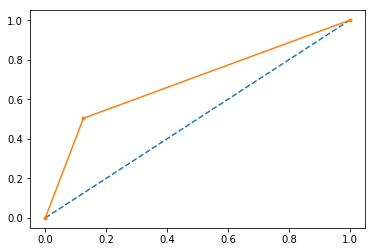

AUC: 0.689


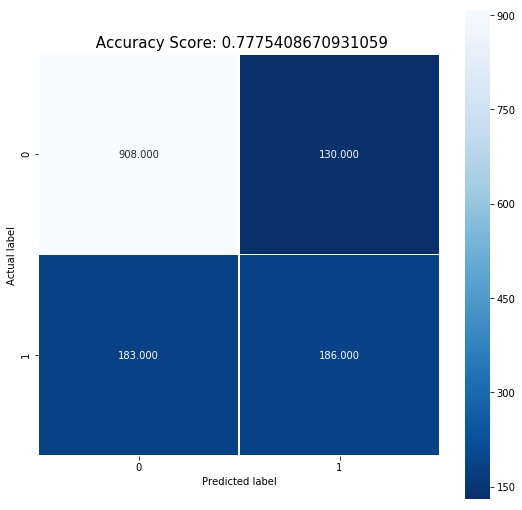

In [21]:
print ('\t\t--------------RANDOM_FOREST_(f_classif)----------------\n\n\n')

from sklearn.ensemble import RandomForestClassifier
Rf= RandomForestClassifier(n_estimators=75)
m=Rf.fit(x_train_selected,y_train)
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test_selected,y_test,predictions)

		--------------MLP_f_classif----------------



              precision    recall  f1-score   support

           0       0.83      0.87      0.85      1038
           1       0.59      0.50      0.54       369

   micro avg       0.78      0.78      0.78      1407
   macro avg       0.71      0.69      0.70      1407
weighted avg       0.77      0.78      0.77      1407



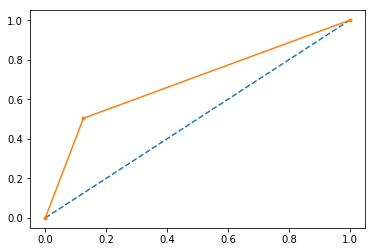

AUC: 0.689


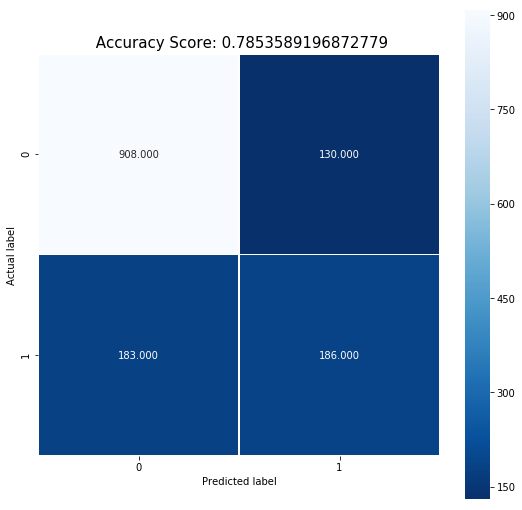

In [22]:
print ('\t\t--------------MLP_f_classif----------------\n\n\n')
from sklearn.neural_network import MLPClassifier
mlp=MLPClassifier(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=50, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)
m= mlp.fit(x_train_selected,y_train)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
roc_plot(m,x_test_selected,y_test,predictions)



		--------------XG-BOOST_classif----------------



              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1038
           1       0.65      0.50      0.56       369

   micro avg       0.80      0.80      0.80      1407
   macro avg       0.74      0.70      0.72      1407
weighted avg       0.79      0.80      0.79      1407



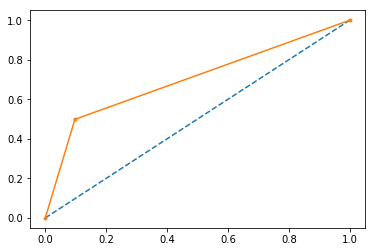

AUC: 0.701


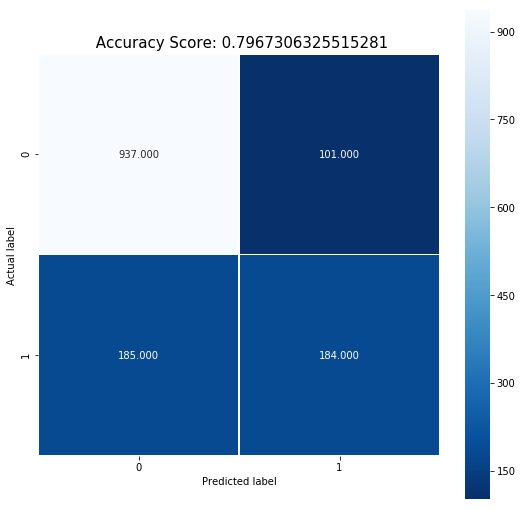

In [23]:
print ('\t\t--------------XG-BOOST_classif----------------\n\n\n')

from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0, max_depth=1)
m=clf.fit(x_train_selected,y_train) 
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]

roc_plot(m,x_test_selected,y_test,predictions)

		--------------LOGISTIC REGRESSION_Processed_classif----------------



              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1038
           1       0.63      0.49      0.55       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.73      0.69      0.71      1407
weighted avg       0.78      0.79      0.78      1407



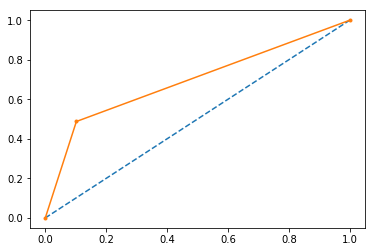

AUC: 0.693


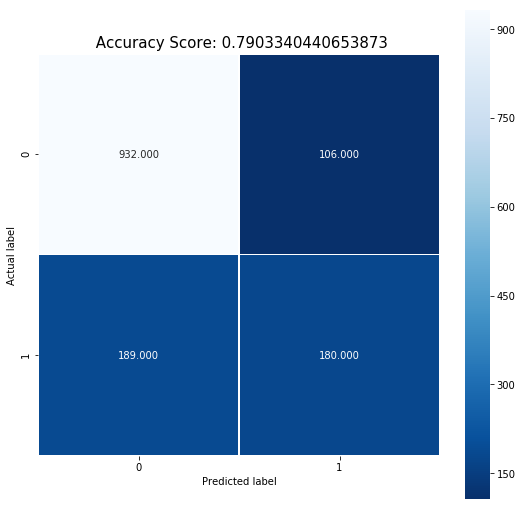

In [24]:

print ('\t\t--------------LOGISTIC REGRESSION_Processed_classif----------------\n\n\n')
from sklearn.linear_model import LogisticRegression

# all parameters not specified are set to their defaults
logisticRegr = LogisticRegression()


m=logisticRegr.fit(x_train_selected, y_train)

predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)



roc_plot(m,x_test_selected,y_test,predictions)

		--------------S.V.M_processed(f_classif)----------------



              precision    recall  f1-score   support

           0       0.80      0.94      0.87      1038
           1       0.68      0.35      0.47       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.74      0.65      0.67      1407
weighted avg       0.77      0.79      0.76      1407



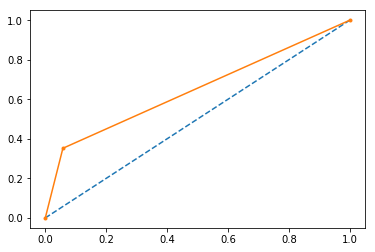

AUC: 0.647


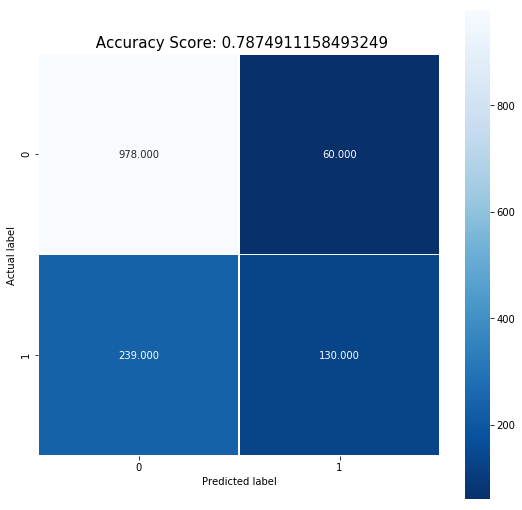

In [25]:
"""--------------------------(MODELING PHASE)--{S.V.M_processed(f_classif)}---------------------------------"""

print ('\t\t--------------S.V.M_processed(f_classif)----------------\n\n\n')
from sklearn.svm import SVC
SVM=SVC(kernel='linear',random_state=0,probability=1)
m=SVM.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)


roc_plot(m,x_test_selected,y_test,predictions)

		--------------Naive Bayes_Processed(f_classif)----------------



              precision    recall  f1-score   support

           0       0.92      0.69      0.79      1038
           1       0.48      0.82      0.61       369

   micro avg       0.72      0.72      0.72      1407
   macro avg       0.70      0.76      0.70      1407
weighted avg       0.80      0.72      0.74      1407



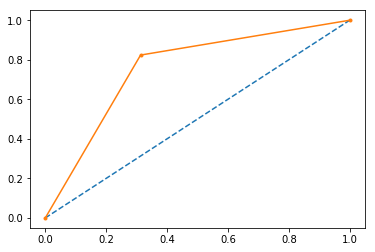

AUC: 0.755


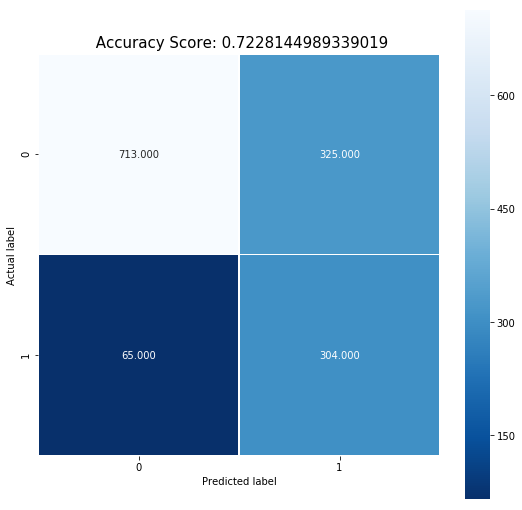

In [26]:
"""--------------------------(MODELING PHASE)--{Naive Bayes_processed(f_classif)}---------------------------------"""

from sklearn.naive_bayes import GaussianNB

print ('\t\t--------------Naive Bayes_Processed(f_classif)----------------\n\n\n')

gnb=GaussianNB()
m= gnb.fit(x_train_selected, y_train)
predictions = m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]




roc_plot(m,x_test_selected,y_test,predictions)

              precision    recall  f1-score   support

           0       0.81      0.94      0.87      1038
           1       0.69      0.38      0.49       369

   micro avg       0.79      0.79      0.79      1407
   macro avg       0.75      0.66      0.68      1407
weighted avg       0.78      0.79      0.77      1407



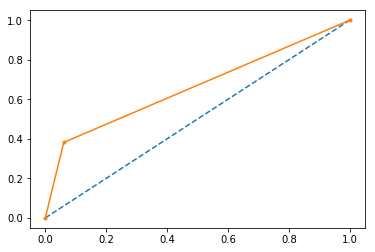

AUC: 0.661


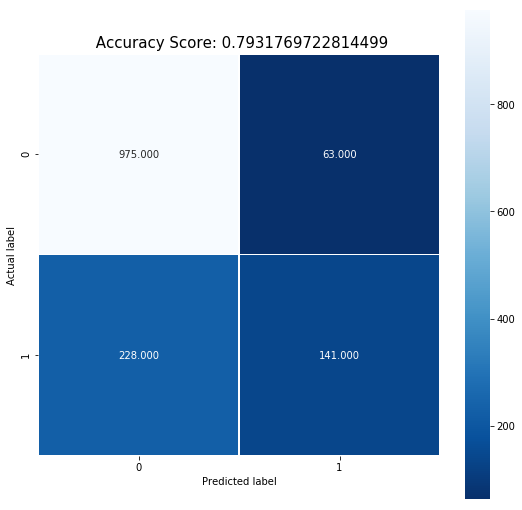

In [27]:
"""--------------(MODELING PHASE)--{DecisionTreeClassifier(Prediction using gini )_processed_(f_classif)}--------------------"""

from sklearn.tree import DecisionTreeClassifier 

clf_gini = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 

m=clf_gini.fit(x_train_selected, y_train) 
predictions=m.predict(x_test_selected)
from sklearn import metrics
mett=metrics.classification_report(y_test,predictions)
print (mett)
p=[]


roc_plot(m,x_test_selected,y_test,predictions)